Epoch 1/20
1875/1875 [==============================] - 157s 83ms/step - loss: 0.1284 - accuracy: 0.9616 - val_loss: 0.0629 - val_accuracy: 0.9812
Epoch 2/20
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.0423 - val_accuracy: 0.9859
Epoch 3/20
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0323 - accuracy: 0.9894 - val_loss: 0.0419 - val_accuracy: 0.9869
Epoch 4/20
1875/1875 [==============================] - 164s 88ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0453 - val_accuracy: 0.9872
Epoch 5/20
1/1 [==============================] - 0s 69ms/step


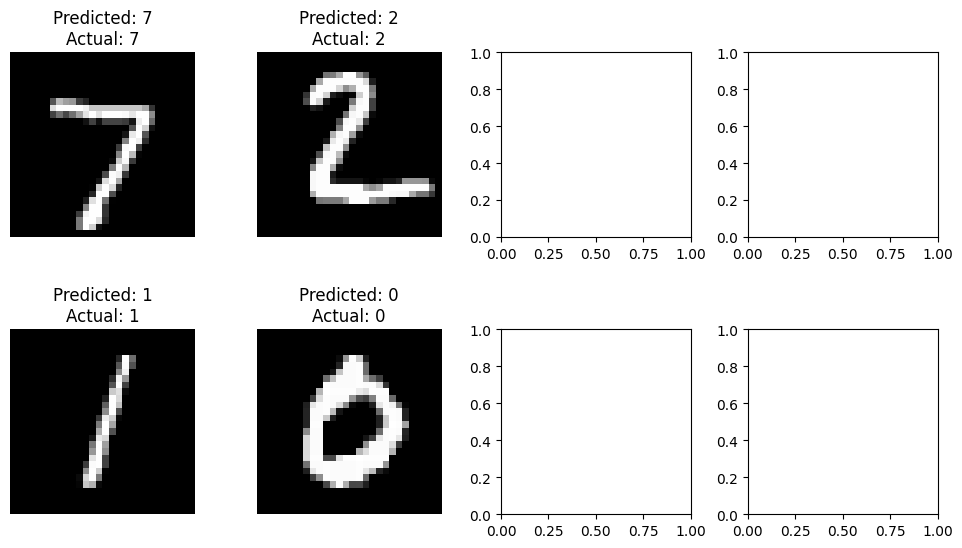

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1) / 255.0
X_test = X_test.reshape(10000, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model architecture
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[early_stopping])

# Visualize predictions
def visualize_predictions(images, predicted_probs, actual_labels, num_images=4):
    num_rows = int(np.ceil(num_images / 2))
    fig, axes = plt.subplots(num_rows, 4, figsize=(12, 3*num_rows))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    for i in range(num_images):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        # Display the image
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Predicted: {np.argmax(predicted_probs[i])}\nActual: {np.argmax(actual_labels[i])}')
        ax.axis('off')

    plt.show()

# Visualize predictions
visualize_predictions(X_test[:4], model.predict(X_test[:4]), y_test[:4])
